In [1]:
from netCDF4 import Dataset

dataset= Dataset('hola.nc', 'w', format='NETCDF4_CLASSIC')
print(dataset.data_model)

NETCDF4_CLASSIC


In [2]:
lat = dataset.createDimension('lat', 73)
lon = dataset.createDimension('lon', 144)
time = dataset.createDimension('time', None)
depth= dataset.createDimension('depth', 30)

In [3]:
import numpy as np

times = dataset.createVariable('time', np.float64, ('time',))
depths = dataset.createVariable('depth', np.float64, ('depth',))
latitudes = dataset.createVariable('latitude', np.float32,('lat',))
longitudes = dataset.createVariable('longitude', np.float32,('lon',)) 
temp = dataset.createVariable('temp', np.float32, ('time','depth','lat','lon')) 


In [4]:
latitudes.units = 'degree_north'
longitudes.units = 'degree_north'
temp.units = 'K'
times.units= 'hours since 00:00:00'
times.calendar = 'gregorian'

In [5]:
lats = np.arange(-90,91,2.5)
lons = np.arange(-180,180,2.5)
prof= np.arange(0,300,10)

latitudes[:] = lats
depths[:] = prof
longitudes[:] = lons

In [6]:
print(temp.shape)

(0, 30, 73, 144)


In [7]:
numeros = range(0,3)
numeros= list(numeros)
np.random.shuffle(numeros)
times = numeros
print(times[:])
print("len", len(times))


[2, 1, 0]
len 3


In [8]:
print(temp.shape)

(0, 30, 73, 144)


In [9]:
from numpy.random import uniform
nlats= len(dataset.dimensions['lat'])
nlons = len(dataset.dimensions['lon'])
ndepths = len(dataset.dimensions['depth'])
print(ndepths)
temp[0:3,:,:,:] = uniform (size=(3,ndepths,nlats,nlons))
print("after adding data", temp.shape)


30
after adding data (3, 30, 73, 144)


#Una vez asignados los valores los ordeno segun el tiempo, de mayor a menor.

In [10]:
lista_ordenada=np.sort(times)
lista_ordenada= lista_ordenada[::-1]

print(lista_ordenada)

orden= np.array([times.index(max(times))])
for n in lista_ordenada[1:]:
    orden=np.append(orden,times.index(n))
    



[2 1 0]


In [11]:
dataset.variables["temp"][0,:,:].shape

(30, 73, 144)

In [12]:
import matplotlib.pyplot as plt

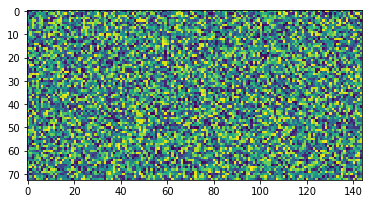

In [13]:
plt.imshow(dataset.variables["temp"][0,1,:,:])

In [14]:
import ipywidgets as widgets
from IPython.display import display

In [15]:
slider = widgets.IntSlider(
    value=0,
    min=0,
    max=30,
    readout=True

)
slider

IntSlider(value=0, max=30)

In [16]:
dataset.variables.keys()

odict_keys(['time', 'depth', 'latitude', 'longitude', 'temp'])

In [17]:
variables= np.array([])
for n in dataset.variables.keys():
    if n not in {'time', 'depth', 'latitude', 'longitude'}:
        variables=np.append(variables,n)
    
print(variables)

['temp']


In [18]:
label_variables=widgets.Label(value='Variables')
label_Fecha=widgets.Label(value='Fecha')
label_prof=widgets.Label(value='Z')

In [19]:
button_var= np.array([label_variables])
for n in variables:
    button_var=np.append(button_var,widgets.Button(description=n))

In [20]:
print(times[:])

[2, 1, 0]


In [21]:
from datetime import datetime, timedelta

fecha_base= datetime(2015, 1, 1)
button_date= np.array([label_Fecha])
for n in np.sort(times):
    button_date=np.append(button_date,widgets.Button(description=str(fecha_base + n *timedelta(hours=24))))


In [22]:
from ipywidgets import Layout, VBox, HBox

box_layout = Layout(display='flex',
                    flex_flow='row',
                    align_items='stretch',
                    width='100%')
slider_layout= Layout(display='flex',
                    flex_flow='column',
                    align_items='center',
                    width='100%')

button_layout= Layout(display='flex',
                    flex_flow='column',
                    align_items='center',
                    width='100%')

vb_date= VBox([button_date[p] for p in range(len(button_date))],layout=button_layout)
vb_var= VBox([button_var[p] for p in range(len(button_var))],layout=button_layout)
vb_slider= VBox([label_prof, slider], layout=slider_layout)

hb=HBox([vb_var, vb_date, vb_slider], layout=box_layout)

In [23]:
prof=slider.value
fecha=times[0]

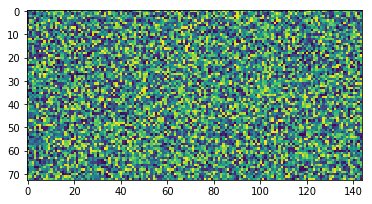

In [24]:
from IPython.display import clear_output

def slider_on_change(v):
    prof=v['new']
    clear_output(wait=False)
    display(hb, plt.imshow(dataset.variables["temp"][fecha,prof,:,:]))
    
def date_on_change(v):
    for n in np.sort(times):
        if v.description in str(fecha_base + n *timedelta(hours=24)):
            fecha=n
        
    clear_output(wait=False)
    display(hb, plt.imshow(dataset.variables["temp"][fecha,prof,:,:]))
    
slider.observe(slider_on_change, names='value')
for i in range(len(button_date)-1):
    button_date[i+1].on_click(date_on_change) 

display(hb, plt.imshow(dataset.variables["temp"][fecha,prof,:,:]))
